# Propulsion Plants Decay Evaluation

#### This notebook is a problem exercise on linear regression. The problem requires us to predict two kinds of decays in Propulsion Plants based on the given data. The data can be downloaded from the parent directory of this notebook on my github.

## Importing libraries...

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

import tensorflow
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Dropout,BatchNormalization

Using TensorFlow backend.


## Importing Data...

In [2]:
data = pd.read_csv('./propulsion.csv')

In [3]:
data.head()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


## Checking dataset...

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     10000 non-null  int64  
 1   Lever position (lp) [ ]                        10000 non-null  float64
 2   Ship speed (v) [knots]                         10000 non-null  float64
 3   Gas Turbine shaft torque (GTT) [kN m]          10000 non-null  float64
 4   Gas Turbine rate of revolutions (GTn) [rpm]    10000 non-null  float64
 5   Gas Generator rate of revolutions (GGn) [rpm]  10000 non-null  float64
 6   Starboard Propeller Torque (Ts) [kN]           10000 non-null  float64
 7   Port Propeller Torque (Tp) [kN]                10000 non-null  float64
 8   HP Turbine exit temperature (T48) [C]          10000 non-null  float64
 9   GT Compressor inlet air temperature (T1) [C]   1000

In [5]:
data.nunique()

Unnamed: 0                                       10000
Lever position (lp) [ ]                              9
Ship speed (v) [knots]                               9
Gas Turbine shaft torque (GTT) [kN m]             9634
Gas Turbine rate of revolutions (GTn) [rpm]       3422
Gas Generator rate of revolutions (GGn) [rpm]     9926
Starboard Propeller Torque (Ts) [kN]              3880
Port Propeller Torque (Tp) [kN]                   3880
HP Turbine exit temperature (T48) [C]             9890
GT Compressor inlet air temperature (T1) [C]         1
GT Compressor outlet air temperature (T2) [C]     9694
HP Turbine exit pressure (P48) [bar]               523
GT Compressor inlet air pressure (P1) [bar]          1
GT Compressor outlet air pressure (P2) [bar]      4000
Gas Turbine exhaust gas pressure (Pexh) [bar]       19
Turbine Injecton Control (TIC) [%]                7403
Fuel flow (mf) [kg/s]                              694
GT Compressor decay state coefficient.              51
GT Turbine

In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

## Checking out the distribution of dependent variable...

(array([576., 396., 585., 400., 583., 410., 582., 408., 578., 386., 577.,
        397., 601., 391., 573., 396., 575., 387., 588., 611.]),
 array([0.95  , 0.9525, 0.955 , 0.9575, 0.96  , 0.9625, 0.965 , 0.9675,
        0.97  , 0.9725, 0.975 , 0.9775, 0.98  , 0.9825, 0.985 , 0.9875,
        0.99  , 0.9925, 0.995 , 0.9975, 1.    ]),
 <a list of 20 Patch objects>)

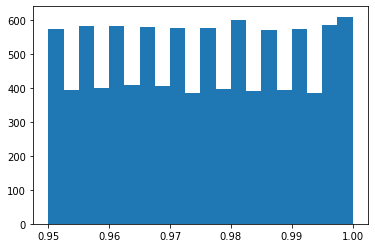

In [7]:
plt.hist(data['GT Compressor decay state coefficient.'], bins = 20)

## Plotting correlation heatmap...

In [8]:
corr_mat = data.corr()

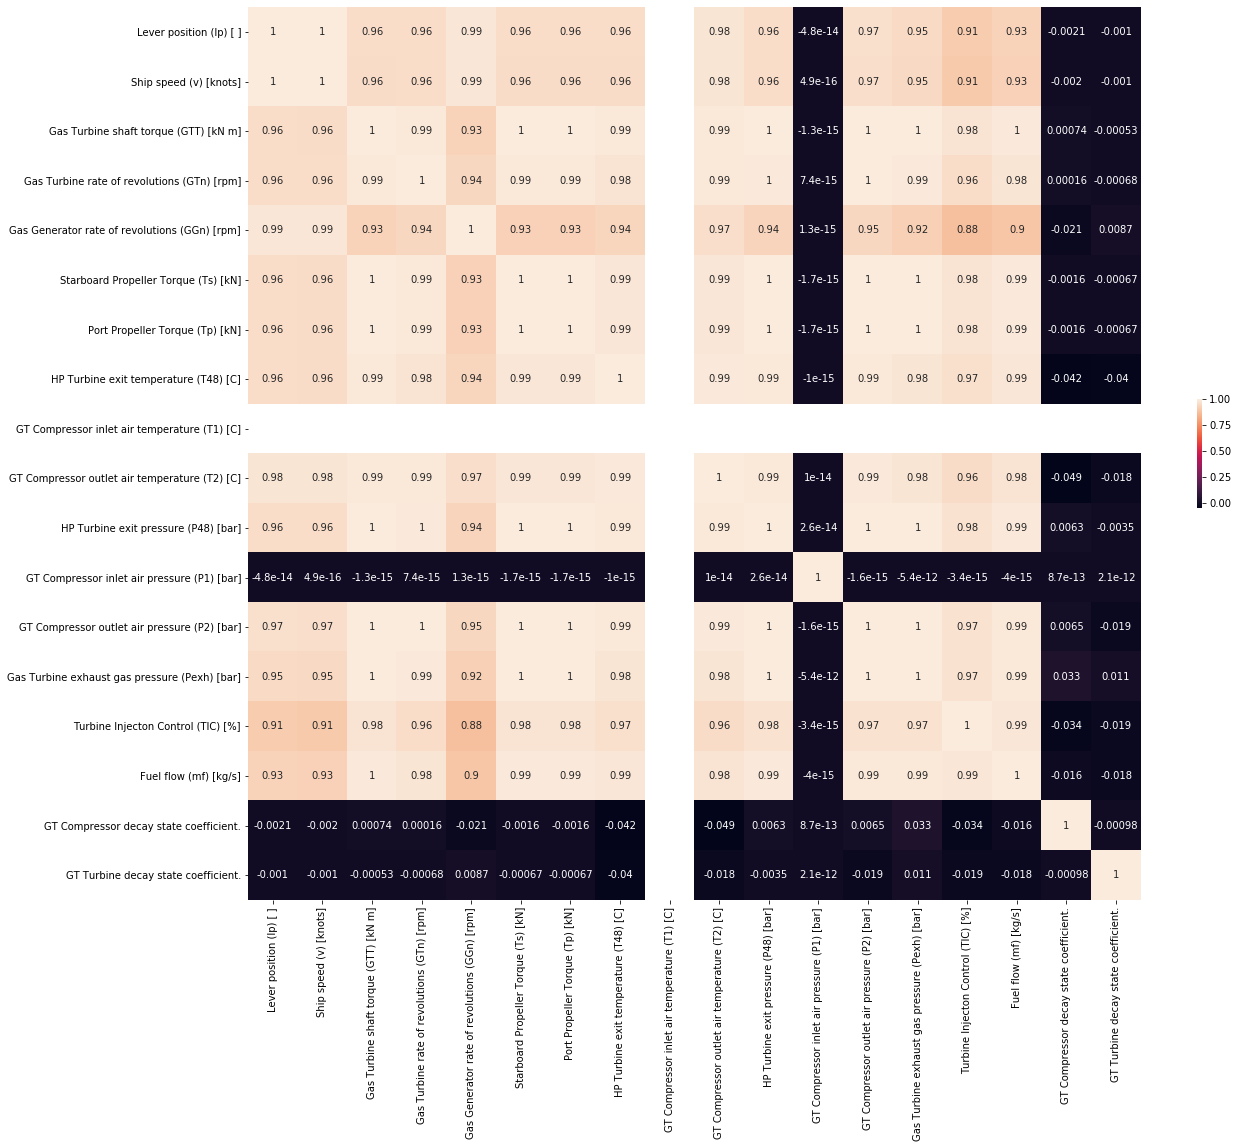

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_mat, square=True, annot=True, cbar_kws = {'shrink': .1}, ax=ax)

## Cleaning the Data...

In [10]:
#dependent variables
dep1 = data['GT Compressor decay state coefficient.']
dep2 = data['GT Turbine decay state coefficient.']

#removing constant valued columns and dependent variables from data
data.drop(['GT Compressor inlet air pressure (P1) [bar]',
          'GT Compressor inlet air temperature (T1) [C]',
          'GT Compressor decay state coefficient.',
          'GT Turbine decay state coefficient.'], axis=1, inplace=True)

In [11]:
data.nunique()

Lever position (lp) [ ]                             9
Ship speed (v) [knots]                              9
Gas Turbine shaft torque (GTT) [kN m]            9634
Gas Turbine rate of revolutions (GTn) [rpm]      3422
Gas Generator rate of revolutions (GGn) [rpm]    9926
Starboard Propeller Torque (Ts) [kN]             3880
Port Propeller Torque (Tp) [kN]                  3880
HP Turbine exit temperature (T48) [C]            9890
GT Compressor outlet air temperature (T2) [C]    9694
HP Turbine exit pressure (P48) [bar]              523
GT Compressor outlet air pressure (P2) [bar]     4000
Gas Turbine exhaust gas pressure (Pexh) [bar]      19
Turbine Injecton Control (TIC) [%]               7403
Fuel flow (mf) [kg/s]                             694
dtype: int64

In [12]:
def normalize(col_data):
    max, min = col_data.max(), col_data.min()
    return np.array((col_data - min) / (max - min), dtype=np.float64)

In [13]:
cols = [col for col in data.columns]

## Encoding data and splitting into training and test sets...

In [14]:
def split_and_encode_data(df, dep_df, cols, factor=0.7):
    m = len(df)
    a = np.zeros((m, 1))
    for col in cols:
        if col=='Ship speed (v) [knots]' or col=='Lever position (lp) [ ]':
            a1 = pd.get_dummies(data[col])
        else:
            #a1 = normalize(df[col])    removed normalization to allow algorithm to learn different levels
            a1 = np.array(df[col])
            a1= a1.reshape(len(a1), 1)
        a = np.concatenate((a, a1), axis = 1)
        
    p = np.random.permutation(m)
    train = a[p[:int(np.floor(m*factor))],:]
    test = a[p[int(np.floor(m*factor)):],:]
    
    y_train = []
    y_test = []
    for dep in dep_df:
        y_train.append(dep[p[:int(np.floor(m*factor))]])
        y_test.append(dep[p[int(np.floor(m*factor)):]])
    
    return train, test, y_train, y_test

In [15]:
train, test, y_train_list, y_test_list = split_and_encode_data(data, [dep1, dep2], cols)

In [16]:
y_train = np.concatenate((np.array(y_train_list[0]).reshape(len(y_train_list[0]),1), np.array(y_train_list[1]).reshape(len(y_train_list[1]),1)), axis = 1)
y_test = np.concatenate((np.array(y_test_list[0]).reshape(len(y_test_list[0]),1), np.array(y_test_list[1]).reshape(len(y_test_list[1]),1)), axis = 1)

In [17]:
train.shape

(7000, 31)

In [18]:
y_train.shape

(7000, 2)

In [19]:
#function to plot loss over the epochs
def plot_loss(history, model_name):
    fig, ax = plt.subplots(1, 1, figsize=(7,5))
    epochs = np.arange(len(history.history['loss']))
    ax.plot(epochs, history.history['val_loss'], label='val_rmse_loss')
    ax.plot(epochs, history.history['loss'], label = 'rmse_loss')
    ax.legend()
    plt.title('loss with {}'.format(model_name))

## Defining RMSE loss function...

In [20]:
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [21]:
def featureNormalize(X):
    X_norm=np.zeros((X.shape))
    mu=np.zeros((1,X.shape[1]))
    sigma=np.zeros((1,X.shape[1]))
    for i in range(X.shape[1]):
        mu[0,i]=np.sum(X[:,i])/X.shape[0]
        sigma[0,i]=np.std(X[:,i])
        X_norm[:,i]=(X[:,i]-mu[0,i])/sigma[0,i]
    return X_norm

## Minimizing RMSE loss using simple linear regression...

In [22]:
def simple_reg(X_train, y_train, X_test, y_test, model_name, var_1 = 'GT Compressor decay state coefficient.', var_2 = 'GT Turbine decay state coefficient.', epochs=20):
    
#     X_train, mu1, sigma1 = featureNormalize(X_train)
#     X_test, mu2, sigma2 = featureNormalize(X_test)
    xi=Input(shape=(X_train.shape[1],))
    x=BatchNormalization()(xi)
    x=Dense(2)(x)
    model = Model(inputs=xi, outputs=x)           # multiple linear regression model...
    model.compile(loss=rmse, optimizer='SGD')
    history=model.fit(X_train, y_train, epochs=epochs, batch_size=128, validation_split=0.3)
    plot_loss(history, model_name)
    
    predictions = model.predict(X_test)
    diff = predictions - y_test
    y1 = np.concatenate((y_test[:,0].reshape(len(y_test[:,0]), 1), predictions[:,0].reshape(len(predictions[:,0]),1), diff[:,0].reshape(len(diff[:,0]), 1)), axis = 1)
    y2 = np.concatenate((y_test[:,1].reshape(len(y_test[:,1]), 1), predictions[:,1].reshape(len(predictions[:,1]),1), diff[:,1].reshape(len(diff[:,1]), 1)), axis = 1)
    print(var_1,' predictions\tdifferences\n\n', y1[:20])
    print(var_2,' predictions\tdifferences\n\n', y2[:20])
    rms = np.sqrt(np.sum(diff*diff)/(2*len(diff)))
    print('root averaged square of errors for {}: {}'.format(model_name, rms))
    return rms

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 4900 samples, validate on 2100 samples
Epoch 1/20
4900/4900 [==============================] - 1s 126us/step - loss: 1.1252 - val_loss: 2.9459
Epoch 2/20
4900/4900 [==============================] - 0s 21us/step - loss: 0.6632 - val_loss: 1.3542
Epoch 3/20
4900/4900 [==============================] - 0s 19us/step - loss: 0.3061 - val_loss: 0.7975
Epoch 4/20
4900/4900 [==============================] - 0s 21us/step - loss: 0.0893 - val_loss: 0.4828
Epoch 5/20
4900/4900 [==============================] - 0s 22us/step - loss: 0.0493 - val_loss: 0.3395
Epoch 6/20
4900/4900 [==============================] - 0s 23us/step - loss: 0.0467 - val_loss: 0.2417
Epoch 7/20
4900/4900 [==============================] - 0s 22us/step - loss: 0.0465 - val_loss: 0.1760
Epoch 8/20
4900/4900 [==============================] - 0s 21us/step - loss: 0.0438 - val_loss: 0.1290
Epoch 9/20
4900/4900 [==========

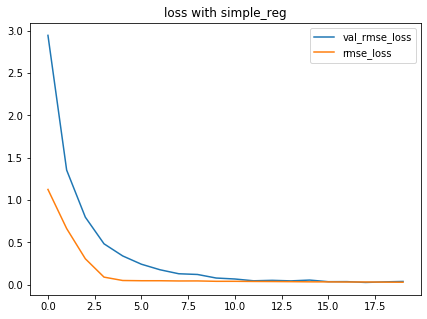

In [23]:
rms_sr = simple_reg(train, y_train, test, y_test, model_name='simple_reg')

## Using Dimensionality Reduction by Principal Component Ananlysis on Data

In [24]:
print('performing principal component analysis on data to reduce dimensionality...')

performing principal component analysis on data to reduce dimensionality...


In [25]:
# define transform
pca = PCA(10)
# prepare transform on dataset
pca.fit(normalize(train))
# apply transform to dataset
trans_train = pca.transform(normalize(train))
trans_test = pca.transform(normalize(test))

Train on 4900 samples, validate on 2100 samples
Epoch 1/20
4900/4900 [==============================] - 0s 78us/step - loss: 0.9421 - val_loss: 0.5665
Epoch 2/20
4900/4900 [==============================] - 0s 18us/step - loss: 0.5229 - val_loss: 0.1965
Epoch 3/20
4900/4900 [==============================] - 0s 19us/step - loss: 0.2552 - val_loss: 0.0915
Epoch 4/20
4900/4900 [==============================] - 0s 17us/step - loss: 0.1613 - val_loss: 0.0720
Epoch 5/20
4900/4900 [==============================] - 0s 16us/step - loss: 0.1137 - val_loss: 0.0529
Epoch 6/20
4900/4900 [==============================] - 0s 16us/step - loss: 0.0836 - val_loss: 0.0388
Epoch 7/20
4900/4900 [==============================] - 0s 16us/step - loss: 0.0641 - val_loss: 0.0284
Epoch 8/20
4900/4900 [==============================] - 0s 16us/step - loss: 0.0513 - val_loss: 0.0217
Epoch 9/20
4900/4900 [==============================] - 0s 16us/step - loss: 0.0432 - val_loss: 0.0182
Epoch 10/20
4900/4900 [==

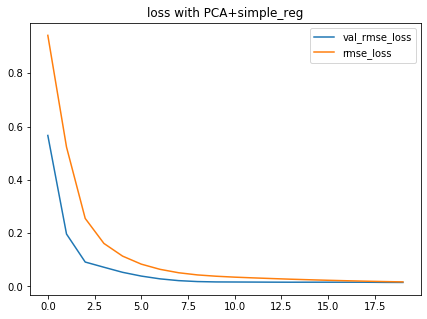

In [26]:
rms_pca_sr = simple_reg(trans_train, y_train, trans_test, y_test, model_name='PCA+simple_reg')

## Minimizing RMSE loss using Neural Networks...

In [27]:
def nn_model(X_train, y_train, X_test, y_test, var_1 = 'GT Compressor decay state coefficient.', var_2 = 'GT Turbine decay state coefficient.' , epochs=20):
    xi=Input(shape=(31,))

    x=Dense(128)(xi)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.5)(x)
    
    x=Dense(64)(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.5)(x)

    x=Dense(32)(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.5)(x)

    x=Dense(2)(x)

    model=Model(inputs=xi, outputs=x)
    
    model.compile(loss=rmse, optimizer='SGD')

    history=model.fit(X_train, y_train, epochs=epochs, batch_size=128, validation_split=0.3)
    
    plot_loss(history, 'nn_model')
    
    predictions = model.predict(X_test)
    diff = predictions - y_test
    y1 = np.concatenate((y_test[:,0].reshape(len(y_test[:,0]), 1), predictions[:,0].reshape(len(predictions[:,0]),1), diff[:,0].reshape(len(diff[:,0]), 1)), axis = 1)
    y2 = np.concatenate((y_test[:,1].reshape(len(y_test[:,1]), 1), predictions[:,1].reshape(len(predictions[:,1]),1), diff[:,1].reshape(len(diff[:,1]), 1)), axis = 1)
    print(var_1,' predictions\tdifferences\n\n', y1[:20])
    print(var_2,' predictions\tdifferences\n\n', y2[:20])
    rms = np.sqrt(np.sum(diff*diff)/(2*len(diff)))
    print('root averaged square of errors for nn_model: {}'.format(rms))
    return rms

Train on 4900 samples, validate on 2100 samples
Epoch 1/25
4900/4900 [==============================] - 2s 332us/step - loss: 1.1254 - val_loss: 0.9470
Epoch 2/25
4900/4900 [==============================] - 0s 75us/step - loss: 0.8739 - val_loss: 0.9008
Epoch 3/25
4900/4900 [==============================] - 0s 74us/step - loss: 0.7631 - val_loss: 0.7156
Epoch 4/25
4900/4900 [==============================] - 0s 73us/step - loss: 0.6589 - val_loss: 0.6146
Epoch 5/25
4900/4900 [==============================] - 0s 73us/step - loss: 0.5789 - val_loss: 0.5309
Epoch 6/25
4900/4900 [==============================] - 0s 73us/step - loss: 0.5134 - val_loss: 0.4646
Epoch 7/25
4900/4900 [==============================] - 0s 73us/step - loss: 0.4467 - val_loss: 0.4319
Epoch 8/25
4900/4900 [==============================] - 0s 73us/step - loss: 0.3878 - val_loss: 0.3760
Epoch 9/25
4900/4900 [==============================] - 0s 74us/step - loss: 0.3438 - val_loss: 0.3330
Epoch 10/25
4900/4900 [=

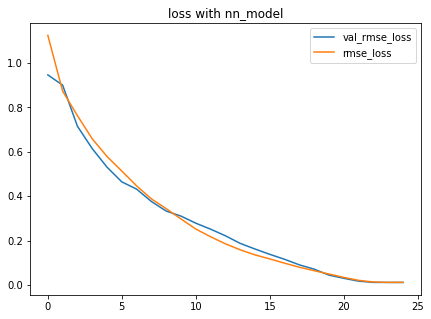

In [28]:
rms_nn = nn_model(train, y_train, test, y_test, epochs = 25)

## Comparing different models...

In [29]:
d = {
    'models':['simple_reg', 'pca+simple_reg', 'nn_model'],
    'root averaged square of errors':[rms_sr, rms_pca_sr, rms_nn]}
rms = pd.DataFrame(d)

In [30]:
rms.head()

,models,root averaged square of errors
0,simple_reg,0.048410
1,pca+simple_reg,0.017707
2,nn_model,0.011734
